<a href="https://colab.research.google.com/github/GaikwadSandesh/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alma_better/Twitter sentiments/Coronavirus Tweets.csv' ,encoding='latin-1')

In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
df.drop(columns='ScreenName' , inplace=True)

In [ ]:
df.head()

,UserName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   Location       32567 non-null  object
 2   TweetAt        41157 non-null  object
 3   OriginalTweet  41157 non-null  object
 4   Sentiment      41157 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

UserName            0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
print(round(100*(df.isnull().sum()/len(df.index)),2))

UserName          0.00
Location         20.87
TweetAt           0.00
OriginalTweet     0.00
Sentiment         0.00
dtype: float64


In [ ]:
#df.dropna()['Location'].value_counts().to_frame().head(25)

In [ ]:
df.drop(columns='Location' , inplace=True)

Location column is missing 20% of data so will will drop this column 

In [ ]:
df['TweetAt']= pd.to_datetime(df['TweetAt'])

In [ ]:
pd.concat([df.head(3), df.tail(3)], axis=0)

,UserName,TweetAt,OriginalTweet,Sentiment
0,3799,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
41154,44953,2020-04-14,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,2020-04-14,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
df['Sentiment'].value_counts().to_frame()

,Sentiment
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


We will ony consider tweet column and use NLP based approch to build classifier

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sw = stopwords.words('english') 

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
def seniment_encoding(Sentiment):
  value = 0
  if Sentiment == 'Extremely Negative':
    value = -10 
  elif Sentiment == 'Negative':
    value = -1 
  elif   Sentiment == 'Extremely Positive':   
    value = 10
  elif Sentiment == 'Positive':
    value = 1
  else:
      pass
  return value
  

In [ ]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
df['filtered'] = df['OriginalTweet'].apply(remove_punctuation)

In [ ]:
#df['filtered'] = df['filtered'].apply(stopwords)

In [ ]:
df['encode_senti'] =  df['Sentiment'].apply(seniment_encoding)

In [ ]:
df.head(25)

,UserName,TweetAt,OriginalTweet,Sentiment,filtered,encode_senti
0,3799,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,0
1,3800,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,1
2,3801,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,1
3,3802,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,1
4,3803,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...,-10
5,3804,2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,news regionâs first confirmed covid19 case ca...,1
6,3805,2020-03-16,Cashier at grocery store was sharing his insig...,Positive,cashier grocery store sharing insights covid19...,1
7,3806,2020-03-16,Was at the supermarket today. Didn't buy toile...,Neutral,supermarket today didnt buy toilet paper rebel...,0
8,3807,2020-03-16,Due to COVID-19 our retail store and classroom...,Positive,due covid19 retail store classroom atlanta ope...,1
9,3808,2020-03-16,"For corona prevention,we should stop to buy th...",Negative,corona preventionwe stop buy things cash use o...,-1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['filtered'] , df['encode_senti'],test_size=0.2 , random_state=42)

In [ ]:
def evaluation_metrics(y_test, y_pred):
  MSE  = round(mean_squared_error(y_test, y_pred), 2)
  print("MSE :" , MSE)

  RMSE = round(np.sqrt(MSE), 2)
  print("RMSE :" ,RMSE)

# Naive Baye count vectriser

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer(max_df =0.9 , min_df = 5)
# fit the count vectorizer using the text data
count_vectorizer.fit(X_train)
# collect the vocabulary items used in the vectorizer
#dictionary = count_vectorizer.vocabulary_.items()

CountVectorizer(max_df=0.9, min_df=5)

In [ ]:
train_vectorized = count_vectorizer.transform(X_train)
test_vectorized = count_vectorizer.transform(X_test)

In [ ]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(train_array,y_train)

In [ ]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

         -10       0.37      0.90      0.53      4425
          -1       0.77      0.16      0.27      7911
           0       0.44      0.93      0.60      6160
           1       0.93      0.11      0.20      9135
          10       0.54      0.64      0.58      5294

    accuracy                           0.47     32925
   macro avg       0.61      0.55      0.44     32925
weighted avg       0.66      0.47      0.40     32925



              precision    recall  f1-score   support

         -10       0.23      0.61      0.34      1056
          -1       0.32      0.08      0.13      2006
           0       0.35      0.70      0.46      1553
           1       0.31      0.04      0.08      2287
          10       0.35      0.39      0.37      1330

    accuracy                           0.31      8232
   macro avg       0.31      0.37      0.27      8232
weighted avg       0.32      0.31      0.24      8232



In [ ]:
evaluation_metrics(y_train, train_preds)
print('==='*25)
evaluation_metrics(y_test, test_preds)

MSE : 41.51
RMSE : 6.44
MSE : 61.18
RMSE : 7.82


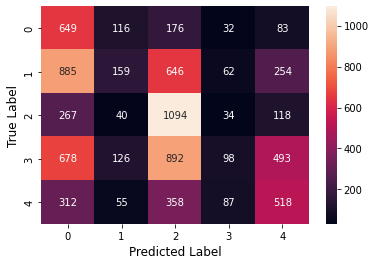

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

# Naive Baye TFidf vectoriser 

In [ ]:
# create a count vectorizer object
count_vectorizer = TfidfVectorizer(max_df =0.9 , min_df = 5)
# fit the count vectorizer using the text data
count_vectorizer.fit(X_train)
# collect the vocabulary items used in the vectorizer
#dictionary = count_vectorizer.vocabulary_.items()

TfidfVectorizer(max_df=0.9, min_df=5)

In [ ]:
train_vectorized = count_vectorizer.transform(X_train)
test_vectorized = count_vectorizer.transform(X_test)
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [ ]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [ ]:
print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

         -10       0.38      0.65      0.48      4425
          -1       0.61      0.16      0.25      7911
           0       0.33      1.00      0.50      6160
           1       1.00      0.06      0.11      9135
          10       0.50      0.39      0.44      5294

    accuracy                           0.39     32925
   macro avg       0.56      0.45      0.36     32925
weighted avg       0.62      0.39      0.32     32925



              precision    recall  f1-score   support

         -10       0.25      0.45      0.32      1056
          -1       0.29      0.09      0.14      2006
           0       0.27      0.80      0.40      1553
           1       0.34      0.03      0.05      2287
          10       0.33      0.24      0.28      1330

    accuracy                           0.28      8232
   macro avg       0.30      0.32      0.24      8232
weighted avg       0.30      0.28      0.21      8232



In [ ]:
evaluation_metrics(y_train, train_preds)
print('==='*25)
evaluation_metrics(y_test, test_preds)

MSE : 41.49
RMSE : 6.44
MSE : 52.06
RMSE : 7.22


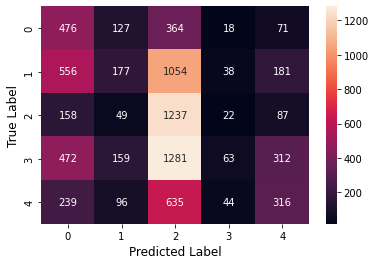

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()